<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/detectSegment/maskRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 190 (delta 12), reused 0 (delta 0), pack-reused 139
Receiving objects: 100% (190/190), 5.97 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [15]:
img_path = './deepLearning/detectSegment/dog_cat.png'

In [16]:
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights
from torchvision.transforms.functional import to_pil_image

img = read_image(img_path)

weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = maskrcnn_resnet50_fpn_v2(weights=weights)
model.eval()

preprocess = weights.transforms()

In [17]:

batch = preprocess(img).unsqueeze(0)
prediction = model(batch)[0]


In [18]:
print(prediction.keys())

dict_keys(['boxes', 'labels', 'scores', 'masks'])


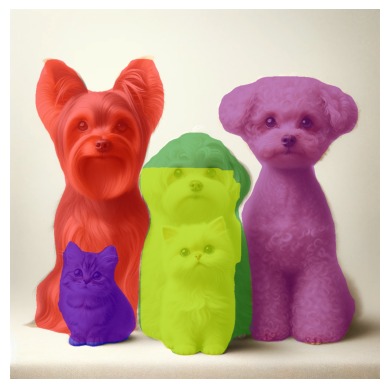

In [19]:
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt

colors = ["red", "green", "blue", "yellow", "purple", "orange"]

result_img = img.clone()
for idx in range(prediction['scores'].shape[0]):
    score = prediction['scores'][idx]
    if score < 0.9:
        break
    color = colors[idx % len(colors)]
    mask = 0.5 < prediction['masks'][idx]
    result_img = draw_segmentation_masks(result_img, mask, alpha=0.5, colors=color)

plt.imshow(to_pil_image(result_img))
plt.axis('off')
plt.show()
